# HI LinkedIn !

## STUDENT ID: CA/DS/12439.
## Name : Mohamed Subair Shakeeb Ahamed.

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder


In [52]:
titanic=pd.read_csv(r"D:\NIBM-AD _Data_Science\Data Visualization\Excel files\Titanic.csv")
titanic.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Checking missing values of the data

In [53]:

missing_values = titanic.isnull().sum()

print(missing_values)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


#### In here  perform some level of EDA before imputation, especially for variables with a high number of missing values like "Age" and "Cabin". This allows you to understand the characteristics of the missing data and its potential impact on your analysis.
 -  PassengerId: A unique identifier for each passenger.
 -  Survived: Indicates whether the passenger survived (1) or not (0).
 -  Pclass: Ticket class of the passenger (1st, 2nd, or 3rd class).
 -  Name: Name of the passenger.
 -  Sex: Gender of the passenger (male or female).
 -  Age: Age of the passenger in years. (Some entries may be missing.)
 -  SibSp: Number of siblings/spouses aboard the Titanic.
 -  Parch: Number of parents/children aboard the Titanic.
 -  Ticket: Ticket number.
 -  Fare: Passenger fare (ticket price).
 -  Cabin: Cabin number where the passenger stayed. (Many entries are missing.)
 -  Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton). 


## Exploratory data analysis (EDA).

In [54]:
# Summary statistics of numerical features
print("\nSummary statistics of numerical features:")
print(titanic.describe())

# Summary of categorical features
print("\nSummary of categorical features:")
print(titanic.describe(include=['object']))




Summary statistics of numerical features:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Summary of categorical features:
    

### The above information illustartes the small exploratory data analysis (EDA) of titanic data set.

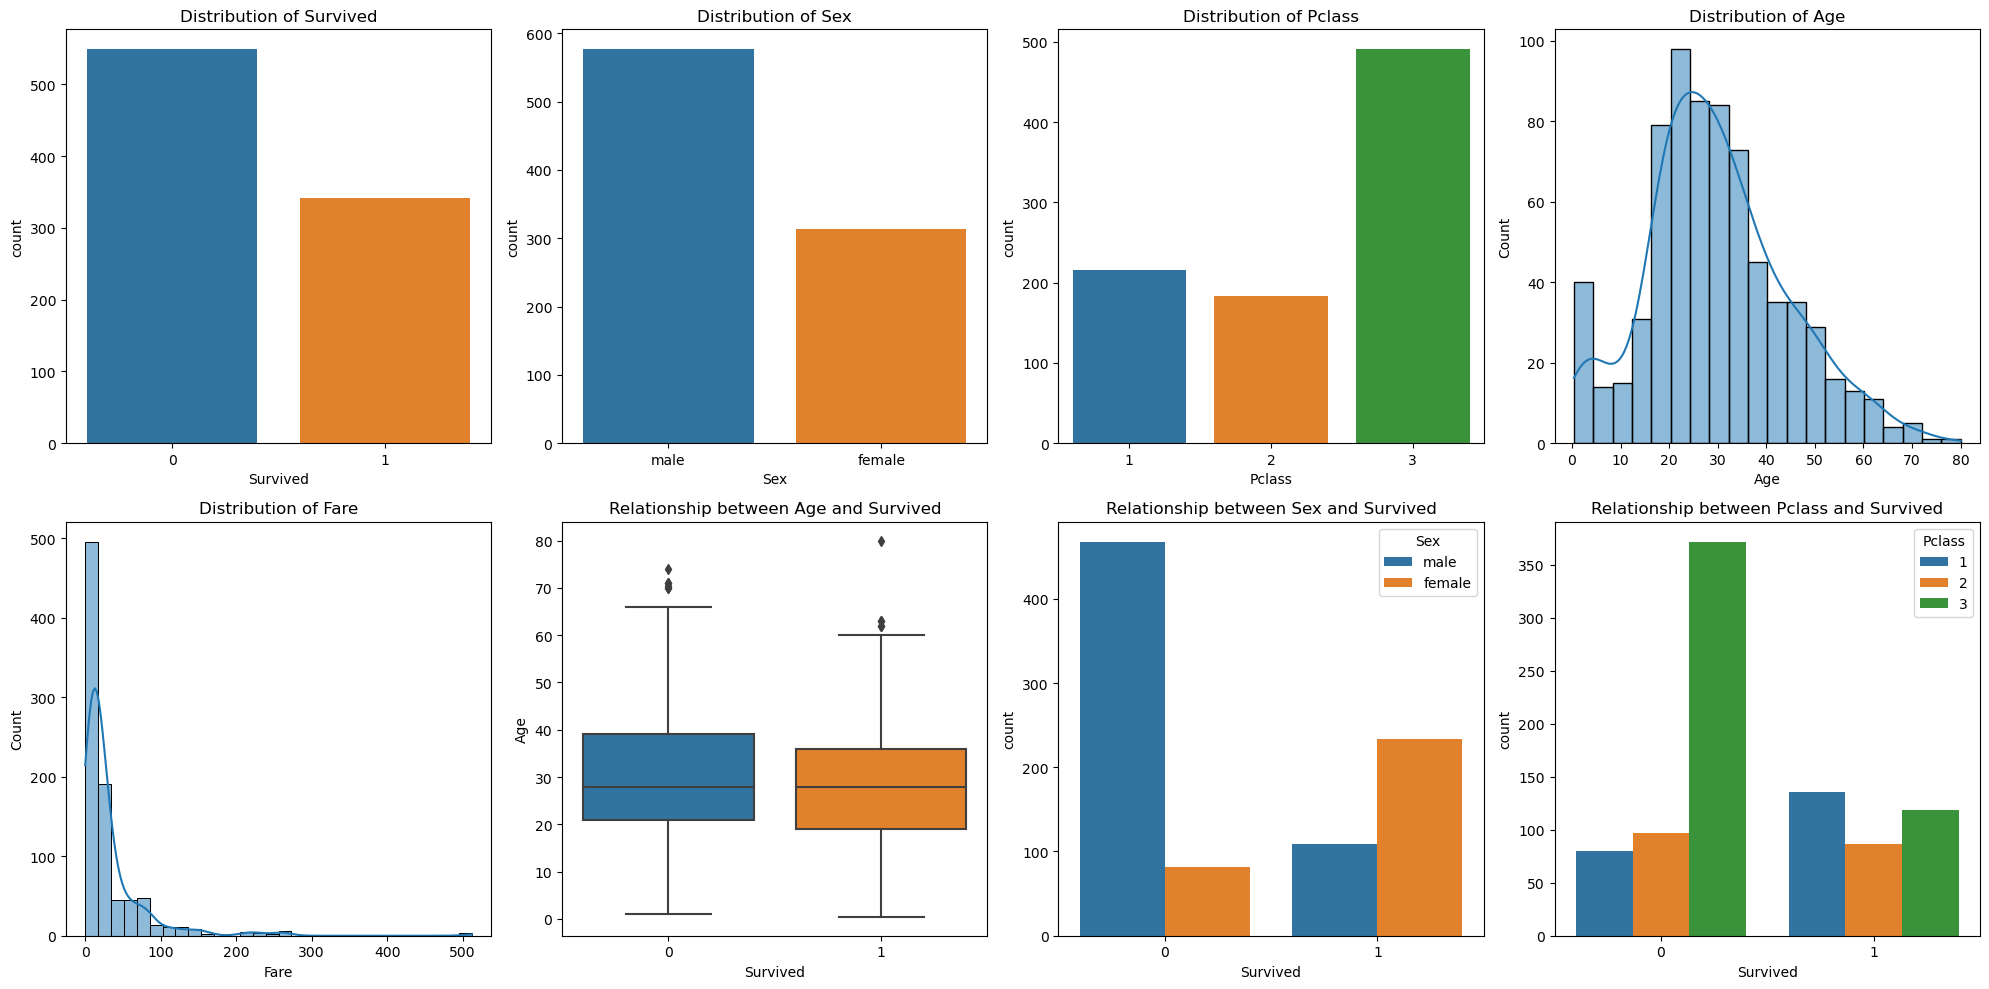

In [55]:


# Create a 2x4 grid of subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Distribution of target variable 'Survived'
sns.countplot(x='Survived', data=titanic, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Survived')

# Distribution of 'Sex'
sns.countplot(x='Sex', data=titanic, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Sex')

# Distribution of 'Pclass'
sns.countplot(x='Pclass', data=titanic, ax=axes[0, 2])
axes[0, 2].set_title('Distribution of Pclass')

# Distribution of 'Age'
sns.histplot(x='Age', data=titanic, bins=20, kde=True, ax=axes[0, 3])
axes[0, 3].set_title('Distribution of Age')

# Distribution of 'Fare'
sns.histplot(x='Fare', data=titanic, bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Fare')

# Relationship between 'Age' and 'Survived'
sns.boxplot(x='Survived', y='Age', data=titanic, ax=axes[1, 1])
axes[1, 1].set_title('Relationship between Age and Survived')

# Relationship between 'Sex' and 'Survived'
sns.countplot(x='Survived', hue='Sex', data=titanic, ax=axes[1, 2])
axes[1, 2].set_title('Relationship between Sex and Survived')

# Relationship between 'Pclass' and 'Survived'
sns.countplot(x='Survived', hue='Pclass', data=titanic, ax=axes[1, 3])
axes[1, 3].set_title('Relationship between Pclass and Survived')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


- In that accident the most people were died.
- The total number of male passengers are higher than female passengers.
- Most people liked to travel in passenger class-3.
- Most male passengers were died rather than female passengers.
- The most female passengers were survived rather than male passengers.
- Most third class passengers were died in this accicent.


## Feature Engineering.

In [56]:
#Impute missing values in the "Age" and "Embarked" columns
# Family Size
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1

# Title Extraction
titanic['Title'] = titanic['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Deck from Cabin
titanic['Deck'] = titanic['Cabin'].str.slice(0,1)

# 2. Binning or Bucketing
# Age Bins
age_bins = [0, 18, 30, 50, 100]  # Define age bins
age_labels = ['Child', 'Young Adult', 'Adult', 'Senior']  # Define corresponding labels
titanic['AgeGroup'] = pd.cut(titanic['Age'], bins=age_bins, labels=age_labels)

# Fare Bins
fare_bins = [-1, 10, 20, 30, 1000]  # Define fare bins
fare_labels = ['Low', 'Medium', 'High', 'Very High']  # Define corresponding labels
titanic['FareGroup'] = pd.cut(titanic['Fare'], bins=fare_bins, labels=fare_labels)

 - When we sum up 'SibSp' and 'Parch', we're essentially counting the number of family members (siblings, spouses, parents, and children) that a passenger has onboard. However, we also need to include the passenger themselves in the count, hence the additional 1.

##### So, by adding 1 to the sum of 'SibSp' and 'Parch', we get the total family size, including the passenger themselves

### Encode categorical varables.

In [42]:
# One-Hot Encoding
encoder = OneHotEncoder(drop='first', sparse=False)  # Drop first column to avoid multicollinearity
encoded_features = encoder.fit_transform(titanic[['Sex', 'Embarked']])

# Create DataFrame from encoded features
encoded_titanic = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Sex', 'Embarked']), index=titanic.index)

# Concatenate encoded features with original DataFrame
titanic_encoded = pd.concat([titanic, encoded_titanic], axis=1)

# Drop original categorical columns
titanic_encoded.drop(['Sex', 'Embarked'], axis=1, inplace=True)

###  Handling missing values.

In [50]:
# Imputation for 'Age' using mean
imputer = SimpleImputer(strategy='mean')
titanic_encoded['Age'] = imputer.fit_transform(titanic_encoded['Age'].values.reshape(-1, 1))

# Imputation for 'Cabin' by creating a new category ('Unknown') for missing values
titanic_encoded['Cabin'].fillna('Unknown', inplace=True)

imputer_embarked_new_columns = SimpleImputer(strategy='most_frequent')
new_columns = ['Embarked_Q', 'Embarked_S']  # List of new columns
titanic_encoded[new_columns] = imputer_embarked_new_columns.fit_transform(titanic_encoded[new_columns])


C:\Users\Shakeeb\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


##  Model Training and Evaluation.

In [62]:
# Define features and target variable
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'Sex_male','Embarked_Q', 'Embarked_S']
X = titanic_encoded[features]
y = titanic_encoded['Survived']



###  Split the dataset into training and testing sets.

In [63]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Model Training.

In [64]:

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

- In here i used random forest classification to training the model.

### Model Evaluation.

In [65]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8156424581005587
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



- Accuracy: Accuracy represents the proportion of correctly classified instances out of the total instances. In this case, the accuracy is approximately 81.56%, indicating that the model correctly classified about 81 out of every 100 instances.

- Precision: Precision measures the accuracy of positive predictions. It is the ratio of true positive predictions to the total number of positive predictions made by the model. In this report, precision is provided for both classes (0 and 1). For class 0 (non-survived), the precision is approximately 83%, indicating that 83% of the instances predicted as non-survived were correctly classified. For class 1 (survived), the precision is approximately 80%, indicating that 80% of the instances predicted as survived were correctly classified.

- Recall: Recall measures the ability of the model to correctly identify positive instances. It is the ratio of true positive predictions to the total number of actual positive instances in the dataset. In this report, recall is provided for both classes (0 and 1). For class 0 (non-survived), the recall is approximately 87%, indicating that 87% of the actual non-survived instances were correctly classified. For class 1 (survived), the recall is approximately 74%, indicating that 74% of the actual survived instances were correctly classified.

- F1-score: F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. In this report, F1-score is provided for both classes (0 and 1). For class 0 (non-survived), the F1-score is approximately 85%. For class 1 (survived), the F1-score is approximately 77%.

- Support: Support is the number of actual occurrences of each class in the dataset. It represents the number of instances of each class in the test set. In this report, support is provided for both classes (0 and 1).

- Macro Avg and Weighted Avg: These are the averages of precision, recall, and F1-score across all classes. The macro avg treats all classes equally, while the weighted avg considers the support of each class.

# Thank you!